In [2]:
import tensorflow as tf 
from tensorflow.keras import datasets,layers,models
import numpy as np
import matplotlib.pyplot as plt

In [3]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [7]:
import os
from PIL import Image

# Paths
input_folder = 'dataset'     # Main dataset folder
output_folder = 'resized_image'  # Where resized images will be saved
target_size = (224, 224)     # Size you want (width, height)

# Create output folder if it doesn't exist
if not os.path.exists(output_folder):
    os.makedirs(output_folder)

# Loop through each class folder
for class_name in os.listdir(input_folder):
    class_path = os.path.join(input_folder, class_name)
    
    if os.path.isdir(class_path):
        output_class_path = os.path.join(output_folder, class_name)
        if not os.path.exists(output_class_path):
            os.makedirs(output_class_path)
        
        for img_name in os.listdir(class_path):
            img_path = os.path.join(class_path, img_name)
            
            try:
                with Image.open(img_path) as img:
                    img = img.convert('RGB')  # ⭐ This line fixes RGBA issue
                    img = img.resize(target_size)
                    img.save(os.path.join(output_class_path, img_name))
            except Exception as e:
                print(f"Error processing {img_path}: {e}")

print("✅ All images resized and saved in", output_folder)


Error processing dataset\Bird-drop\.ipynb_checkpoints: [Errno 13] Permission denied: 'dataset\\Bird-drop\\.ipynb_checkpoints'
✅ All images resized and saved in resized_image


In [4]:
img_size=224
batch_size=32

In [8]:
data=tf.keras.preprocessing.image_dataset_from_directory(
    "resized_image",
    shuffle=True,
    image_size=(img_size,img_size),
    batch_size=batch_size
    
)

Found 769 files belonging to 6 classes.


In [9]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# train test split

data_gen=ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
    
)


In [10]:
base_dir="resized_image"

In [11]:
#training

train_gen=data_gen.flow_from_directory(
    base_dir,
    target_size=(img_size,img_size),
    batch_size=batch_size,
    subset='training',
    class_mode='categorical'
    
)

Found 618 images belonging to 6 classes.


In [12]:
#validation

validation=data_gen.flow_from_directory(
    base_dir,
    target_size=(img_size,img_size),
    batch_size=batch_size,
    subset='validation', 
    class_mode='categorical'
)

Found 151 images belonging to 6 classes.


In [22]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.models import Model

# Load base model
modelm = MobileNetV2(weights='imagenet', include_top=False, input_shape=(img_size, img_size, 3))
modelm.trainable = False

# Add top layers
x = modelm.output
x = GlobalAveragePooling2D()(x)  # Converts (None, 7, 7, 1280) to (None, 1280)
x = Dropout(0.5)(x)
prediction = Dense(train_gen.num_classes, activation='softmax')(x)  # Output: (None, 6)

# Build the final model
modelx = Model(inputs=modelm.input, outputs=prediction)


In [23]:
modelx.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


In [24]:
history=modelx.fit(train_gen,
                  epochs=30,
                  validation_data=validation)

Epoch 1/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.2448 - loss: 2.2708

C:\Users\wicky\tf-env\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


20/20 ━━━━━━━━━━━━━━━━━━━━ 97s 3s/step - accuracy: 0.2465 - loss: 2.2577 - val_accuracy: 0.5298 - val_loss: 1.2673
Epoch 2/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 50s 2s/step - accuracy: 0.4308 - loss: 1.5100 - val_accuracy: 0.6424 - val_loss: 0.9817
Epoch 3/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 81s 2s/step - accuracy: 0.5945 - loss: 1.0979 - val_accuracy: 0.7020 - val_loss: 0.8668
Epoch 4/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 43s 2s/step - accuracy: 0.6172 - loss: 0.9793 - val_accuracy: 0.6755 - val_loss: 0.8469
Epoch 5/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 87s 2s/step - accuracy: 0.7028 - loss: 0.8734 - val_accuracy: 0.7351 - val_loss: 0.7596
Epoch 6/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 82s 2s/step - accuracy: 0.7087 - loss: 0.7715 - val_accuracy: 0.7219 - val_loss: 0.7556
Epoch 7/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 43s 2s/step - accuracy: 0.7766 - loss: 0.6871 - val_accuracy: 0.7285 - val_loss: 0.7220
Epoch 8/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 113s 4s/step - accuracy: 0.7978 - loss: 0.6431 - val_accuracy: 0.7417 - val_loss: 0.6967
Ep

In [25]:
modelx.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_6 (InputLayer)    │ (None, 224, 224, 3)       │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ Conv1 (Conv2D)                │ (None, 112, 112, 32)      │             864 │ input_layer_6[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ bn_Conv1 (BatchNormalization) │ (None, 112, 112, 32)      │             128 │ Conv1[0][0]                │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ Conv1_relu (ReLU)             │ (None, 112, 112, 32)      │               0 │ bn_Conv1[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_depthwise       │ (None, 112, 112, 32)      │             288 │ Conv1_relu[0][0]           │
│ (DepthwiseConv2D)             │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_depthwise_BN    │ (None, 112, 112, 32)      │             128 │ expanded_conv_depthwise[0… │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_depthwise_relu  │ (None, 112, 112, 32)      │               0 │ expanded_conv_depthwise_B… │
│ (ReLU)                        │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_project         │ (None, 112, 112, 16)      │             512 │ expanded_conv_depthwise_r… │
│ (Conv2D)                      │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_project_BN      │ (None, 112, 112, 16)      │              64 │ expanded_conv_project[0][… │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block_1_expand (Conv2D)       │ (None, 112, 112, 96)      │           1,536 │ expanded_conv_project_BN[… │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block_1_expand_BN             │ (None, 112, 112, 96)      │             384 │ block_1_expand[0][0]       │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block_1_expand_relu (ReLU)    │ (None, 112, 112, 96)      │               0 │ block_1_expand_BN[0][0]    │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block_1_pad (ZeroPadding2D)   │ (None, 113, 113, 96)      │               0 │ block_1_expand_relu[0][0]  │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block_1_depthwise             │ (None, 56, 56, 96)        │             864 │ block_1_pad[0][0]          │
│ (DepthwiseConv2D)             │                           │               

 Total params: 2,281,044 (8.70 MB)

 Trainable params: 7,686 (30.02 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

 Optimizer params: 15,374 (60.06 KB)

In [26]:
#evaluting
print("evaluting model")
val_loss,val_accuracy= modelx.evaluate(validation,steps=validation.samples // batch_size)
print(f"validation accuracy: {val_accuracy * 100:.2f} ")

evaluting model
4/4 ━━━━━━━━━━━━━━━━━━━━ 11s 3s/step - accuracy: 0.7365 - loss: 0.6467
validation accuracy: 73.44 


In [27]:
modelx.save('mobilenet.h5')

In [11]:
#model definitionsabs

model=models.Sequential()

model.add(layers.Conv2D(32,(3,3),activation='relu',input_shape=(img_size,img_size,3)))
model.add(layers.MaxPooling2D(2,2))

model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.MaxPooling2D(2,2))

model.add(layers.Flatten())
model.add(layers.Dense(256,activation='relu'))
model.add(layers.Dense(train_gen.num_classes,activation='softmax'))

C:\Users\wicky\tf-env\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [21]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 109, 109, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 186624)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │      47,776,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 6)                   │           1,542 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 47,796,934 (182.33 MB)

 Trainable params: 47,796,934 (182.33 MB)

 Non-trainable params: 0 (0.00 B)

In [12]:
#compile the mmodel
model.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])


In [13]:
#training

history=model.fit(
    train_gen,
    steps_per_epoch=train_gen.samples // batch_size,
    epochs=30,
    validation_data=validation,
    validation_steps=validation.samples // batch_size
)

C:\Users\wicky\tf-env\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/30
21/21 ━━━━━━━━━━━━━━━━━━━━ 222s 9s/step - accuracy: 0.2102 - loss: 11.1543 - val_accuracy: 0.2313 - val_loss: 1.7189
Epoch 2/30
 1/21 ━━━━━━━━━━━━━━━━━━━━ 1:34 5s/step - accuracy: 0.2188 - loss: 1.8285

C:\Users\wicky\tf-env\lib\site-packages\keras\src\trainers\epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


21/21 ━━━━━━━━━━━━━━━━━━━━ 15s 534ms/step - accuracy: 0.2188 - loss: 1.8285 - val_accuracy: 0.2375 - val_loss: 1.6970
Epoch 3/30
21/21 ━━━━━━━━━━━━━━━━━━━━ 119s 6s/step - accuracy: 0.3409 - loss: 1.6085 - val_accuracy: 0.4125 - val_loss: 1.4493
Epoch 4/30
21/21 ━━━━━━━━━━━━━━━━━━━━ 16s 499ms/step - accuracy: 0.4375 - loss: 1.4722 - val_accuracy: 0.4625 - val_loss: 1.5422
Epoch 5/30
21/21 ━━━━━━━━━━━━━━━━━━━━ 132s 6s/step - accuracy: 0.6085 - loss: 1.1182 - val_accuracy: 0.5312 - val_loss: 1.3318
Epoch 6/30
21/21 ━━━━━━━━━━━━━━━━━━━━ 36s 2s/step - accuracy: 0.7188 - loss: 0.8241 - val_accuracy: 0.5750 - val_loss: 1.2116
Epoch 7/30
21/21 ━━━━━━━━━━━━━━━━━━━━ 108s 5s/step - accuracy: 0.8395 - loss: 0.5410 - val_accuracy: 0.6187 - val_loss: 1.1432
Epoch 8/30
21/21 ━━━━━━━━━━━━━━━━━━━━ 17s 645ms/step - accuracy: 1.0000 - loss: 0.2020 - val_accuracy: 0.6250 - val_loss: 1.0623
Epoch 9/30
21/21 ━━━━━━━━━━━━━━━━━━━━ 120s 6s/step - accuracy: 0.9591 - loss: 0.2455 - val_accuracy: 0.6000 - val_los

In [14]:
#evaluting
print("evaluting model")
val_loss,val_accuracy= model.evaluate(validation,steps=validation.samples // batch_size)
print(f"validation accuracy: {val_accuracy * 100:.2f} ")

evaluting model
5/5 ━━━━━━━━━━━━━━━━━━━━ 13s 2s/step - accuracy: 0.6633 - loss: 1.2067
validation accuracy: 65.00 


Evaluating model...
5/5 ━━━━━━━━━━━━━━━━━━━━ 12s 2s/step - accuracy: 0.6141 - loss: 1.5318
Validation Loss: 1.4855
Validation Accuracy: 62.50%
6/6 ━━━━━━━━━━━━━━━━━━━━ 16s 3s/step
Length of true labels: 171
Length of predicted labels: 171

Classification Report:
                   precision    recall  f1-score   support

        Bird-drop       0.19      0.21      0.20        38
            Clean       0.23      0.21      0.22        38
            Dusty       0.25      0.37      0.30        38
Electrical-damage       0.00      0.00      0.00        20
  Physical-Damage       0.29      0.15      0.20        13
     Snow-Covered       0.21      0.12      0.16        24

         accuracy                           0.20       171
        macro avg       0.19      0.18      0.18       171
     weighted avg       0.20      0.20      0.20       171



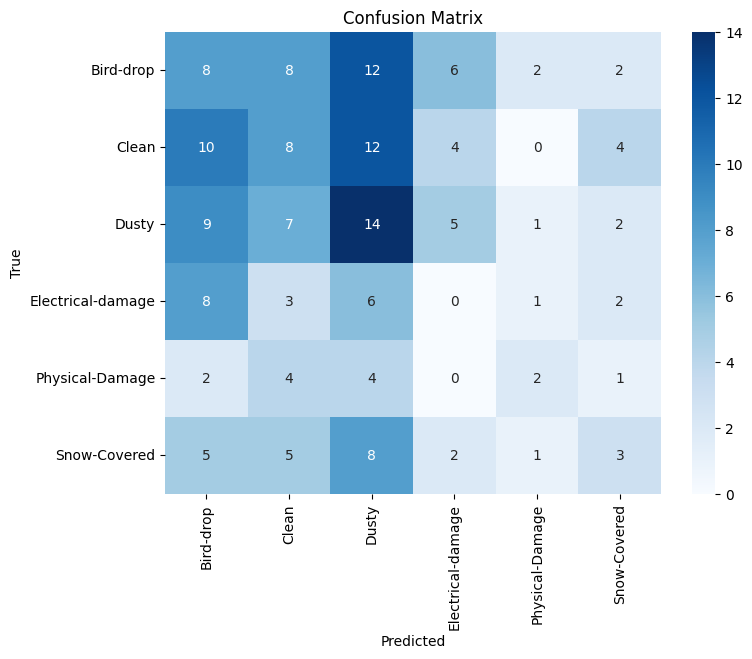

In [25]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Evaluate the model on the validation set (includes loss and accuracy)
print("Evaluating model...")
val_loss, val_accuracy = model.evaluate(validation, steps=validation.samples // batch_size)
print(f"Validation Loss: {val_loss:.4f}")
print(f"Validation Accuracy: {val_accuracy * 100:.2f}%")

# Get predictions on the validation set
y_pred = model.predict(validation, steps=validation.samples // batch_size + 1, verbose=1)

# Convert predictions from probabilities to class labels
y_pred_classes = np.argmax(y_pred, axis=1)

# True labels (from the validation set)
y_true = validation.classes

# Ensure the number of samples in true labels and predicted labels match
print(f"Length of true labels: {len(y_true)}")
print(f"Length of predicted labels: {len(y_pred_classes)}")

# If the lengths don't match, raise an error
assert len(y_true) == len(y_pred_classes), f"Mismatch in number of samples: {len(y_true)} != {len(y_pred_classes)}"

# Classification Report (Precision, Recall, F1-Score)
print("\nClassification Report:")
print(classification_report(y_true, y_pred_classes, target_names=validation.class_indices.keys()))

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred_classes)

# Plot Confusion Matrix
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=validation.class_indices.keys(), yticklabels=validation.class_indices.keys())
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


In [15]:
model.save('solar_xx.h5')


In [23]:
from tensorflow.keras.preprocessing import image
import numpy as np 

img=image.load_img("E:/solar_panel/dataset/Bird-drop/Bird (1).jpeg",target_size=(224,224))

#convert image to array

array_img=image.img_to_array(img)

#normaliseabs

array_img=array_img / 255.0

#add batch

array_img=np.expand_dims(array_img,axis=0)

#prediction
prediction=model.predict(array_img)

#prediction class 

class_pred=np.argmax(prediction,axis=1)

class_names = ['Bird-Drop', 'Clean', 'Dusty', 'Electrical-Damage', 'Physical-Damage', 'Snow-Covered']  # adjust based on your classes
print(f"Predicted class: {class_names[class_pred[0]]}")




1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 252ms/step
Predicted class: Bird-Drop


In [18]:
import cv2
import random
import os

data_dir='resized_dataset'

class_count={}

for class_name in os.listdir(data_dir):
    class_path= os.path.join(data_dir,class_name)
    if os.path.isdir(class_path):
        class_count[class_name]=len(os.listdir(class_path))
    

C:\Users\wicky\AppData\Local\Temp\ipykernel_9104\2412375066.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(class_count.keys()),y=list(class_count.values()),palette='viridis')


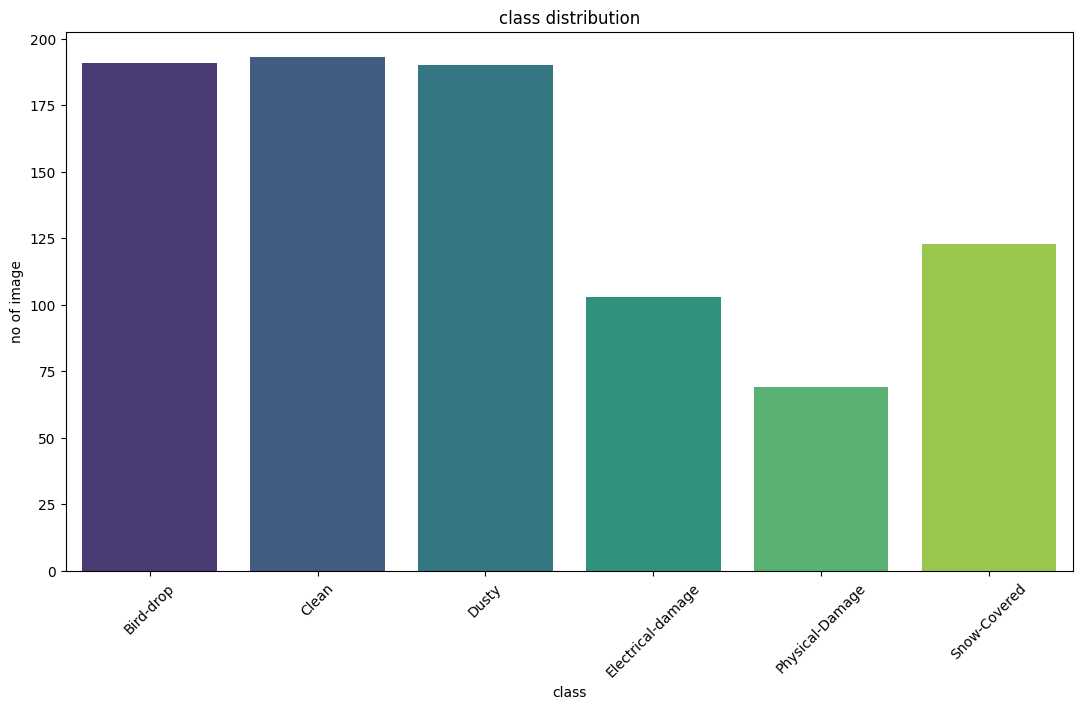

In [10]:
#plot class distribution
import seaborn as sns

plt.figure(figsize=(13,7))
sns.barplot(x=list(class_count.keys()),y=list(class_count.values()),palette='viridis')
plt.title('class distribution')
plt.xlabel('class')
plt.ylabel('no of image')
plt.xticks(rotation=45)
plt.show()

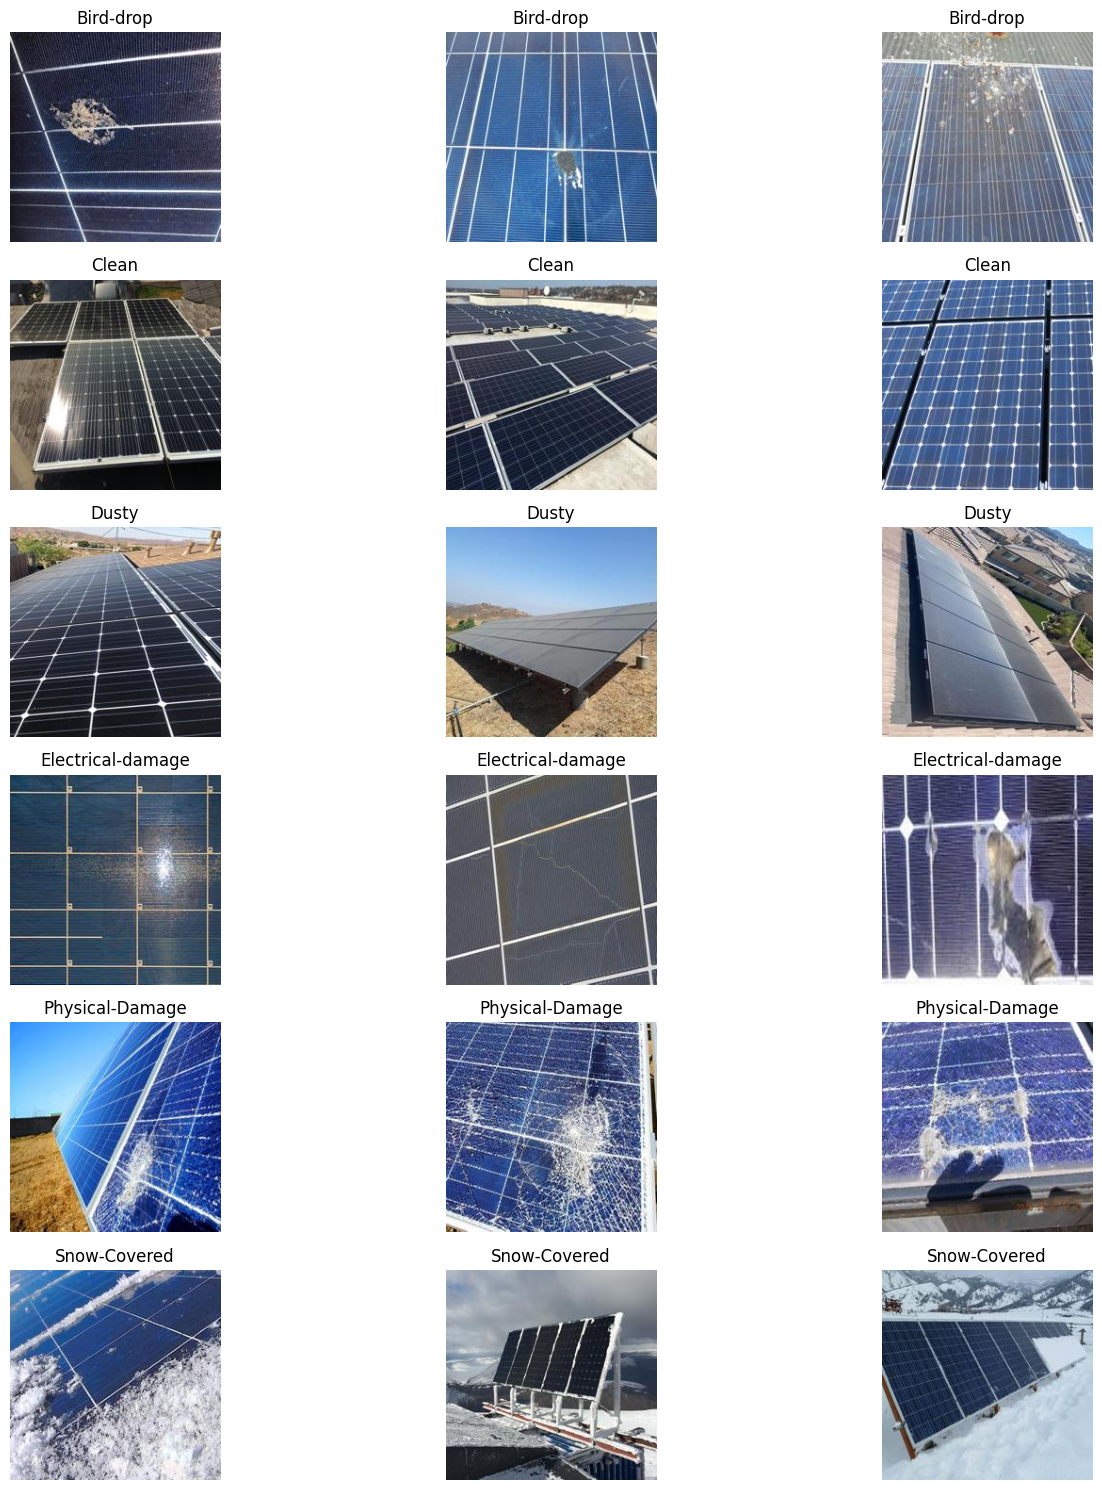

In [12]:
# 3. Show sample images from each class
def show_samples(data_dir, classes, samples_per_class=3):
    plt.figure(figsize=(15, len(classes)*2.5))
    i = 1
    for class_name in classes:
        class_folder = os.path.join(data_dir, class_name)
        images = os.listdir(class_folder)
        for _ in range(samples_per_class):
            img_path = os.path.join(class_folder, random.choice(images))
            img = cv2.imread(img_path)
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            plt.subplot(len(classes), samples_per_class, i)
            plt.imshow(img)
            plt.axis('off')
            plt.title(class_name)
            i += 1
    plt.tight_layout()
    plt.show()

show_samples(data_dir, list(class_count.keys()), samples_per_class=3)

In [14]:
# 4. Check image size distribution
from PIL import Image
img_sizes = []
for class_name in os.listdir(data_dir):
    class_folder = os.path.join(data_dir, class_name)
    for img_file in os.listdir(class_folder):
        img_path = os.path.join(class_folder, img_file)
        with Image.open(img_path) as img:
            img_sizes.append(img.size)  # (width, height)

widths, heights = zip(*img_sizes)

print(f"Average width: {np.mean(widths):.2f}")
print(f"Average height: {np.mean(heights):.2f}")

Average width: 224.00
Average height: 224.00


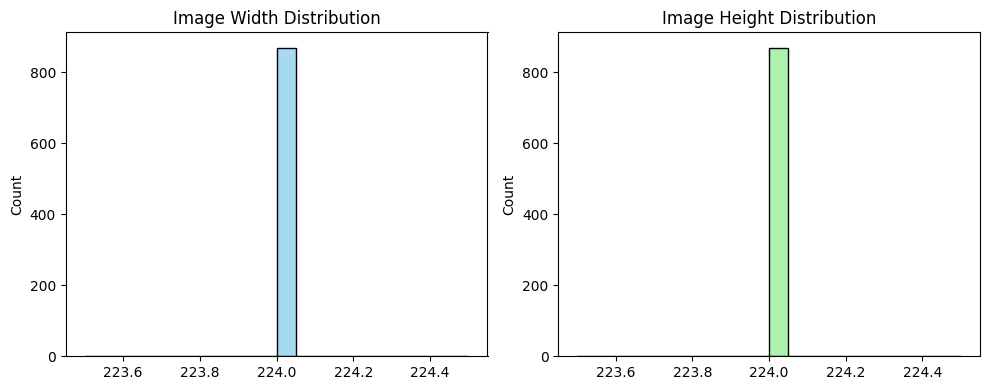

In [16]:
#Optional: Visualize distribution of image sizes
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
sns.histplot(widths, bins=20, color='skyblue')
plt.title('Image Width Distribution')

plt.subplot(1, 2, 2)
sns.histplot(heights, bins=20, color='lightgreen')
plt.title('Image Height Distribution')

plt.tight_layout()
plt.show()

C:\Users\wicky\tf-env\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


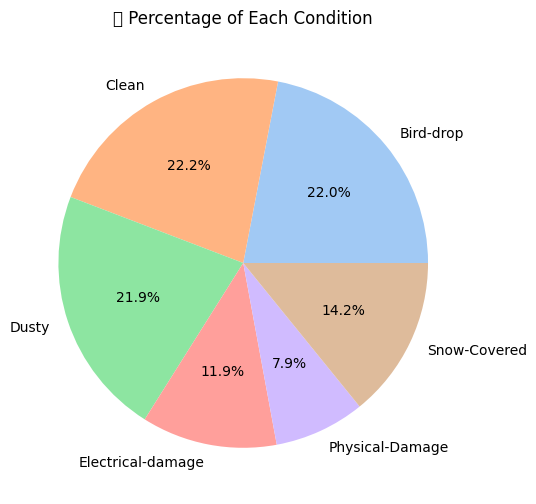

In [21]:
plt.figure(figsize=(6, 6))
plt.pie(class_count.values(), labels=class_count.keys(), autopct='%1.1f%%', colors=sns.color_palette('pastel'))
plt.title("📊 Percentage of Each Condition")
plt.show()


In [ ]:
!streamlit run main.py

In [25]:
import os 

current=os.getcwd()
print(current)

E:\solar_panel


In [27]:
import os
import random
import shutil

# Define paths
data_dir = 'E:/solar_panel/resized_dataset'  # Path to your folder containing class subfolders
train_dir = 'E:/solar_panel/train/images'
val_dir = 'E:/solar_panel/val/images'

# Create train/val directories
os.makedirs(train_dir, exist_ok=True)
os.makedirs(val_dir, exist_ok=True)

# Loop through each class folder
class_names = os.listdir(data_dir)  # Get the list of class folders
for class_name in class_names:
    class_folder = os.path.join(data_dir, class_name)
    
    # Ensure it's a folder (not a file)
    if os.path.isdir(class_folder):
        # Get list of image files in the current class folder
        all_images = [f for f in os.listdir(class_folder) if f.endswith(('.jpg', '.png'))]
        
        # Shuffle and split the images (80% train, 20% val)
        random.shuffle(all_images)
        train_images = all_images[:int(0.8 * len(all_images))]
        val_images = all_images[int(0.8 * len(all_images)):]

        # Create subdirectories for each class in train and val folders
        os.makedirs(os.path.join(train_dir, class_name), exist_ok=True)
        os.makedirs(os.path.join(val_dir, class_name), exist_ok=True)
        
        # Move the images into their respective train/val directories
        for img in train_images:
            shutil.move(os.path.join(class_folder, img), os.path.join(train_dir, class_name, img))
        
        for img in val_images:
            shutil.move(os.path.join(class_folder, img), os.path.join(val_dir, class_name, img))

        print(f"Class '{class_name}' - Training set size: {len(train_images)}; Validation set size: {len(val_images)}")

print("Data split completed!")


Class 'Bird-drop' - Training set size: 135; Validation set size: 34
Class 'Clean' - Training set size: 147; Validation set size: 37
Class 'Dusty' - Training set size: 152; Validation set size: 38
Class 'Electrical-damage' - Training set size: 72; Validation set size: 18
Class 'Physical-Damage' - Training set size: 52; Validation set size: 14
Class 'Snow-Covered' - Training set size: 84; Validation set size: 21
Data split completed!


In [ ]:
!streamlit run main.py